# import data

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style('ticks') #No grid with ticks
print(sns.__version__)
from sklearn.feature_selection import SelectKBest #Feature Selector
from sklearn.feature_selection import f_classif #F-ratio statistic for categorical values

0.12.2


# data analysis

In [15]:
fetal=pd.read_csv('fetal_health.csv')
fetal.info()
fetal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [16]:
#Dropping duplicates
fetal_dup=fetal.copy()
fetal_dup.drop_duplicates(inplace=True)
print('Total number of replicates are:', fetal.shape[0] - fetal_dup.shape[0])
fetal=fetal_dup.copy()
fetal

Total number of replicates are: 13


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64


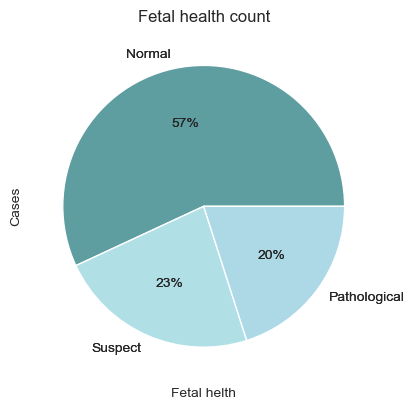

In [17]:
#piechart
total = fetal["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

print(fetal["fetal_health"].value_counts())

plt.figure(figsize = (10,5))


plt.subplot(122)
plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
plt.title("Fetal state") 

vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ["#5F9EA0", "#B0E0E6", "#ADD8E6"], autopct="%1.0f%%")
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.show()

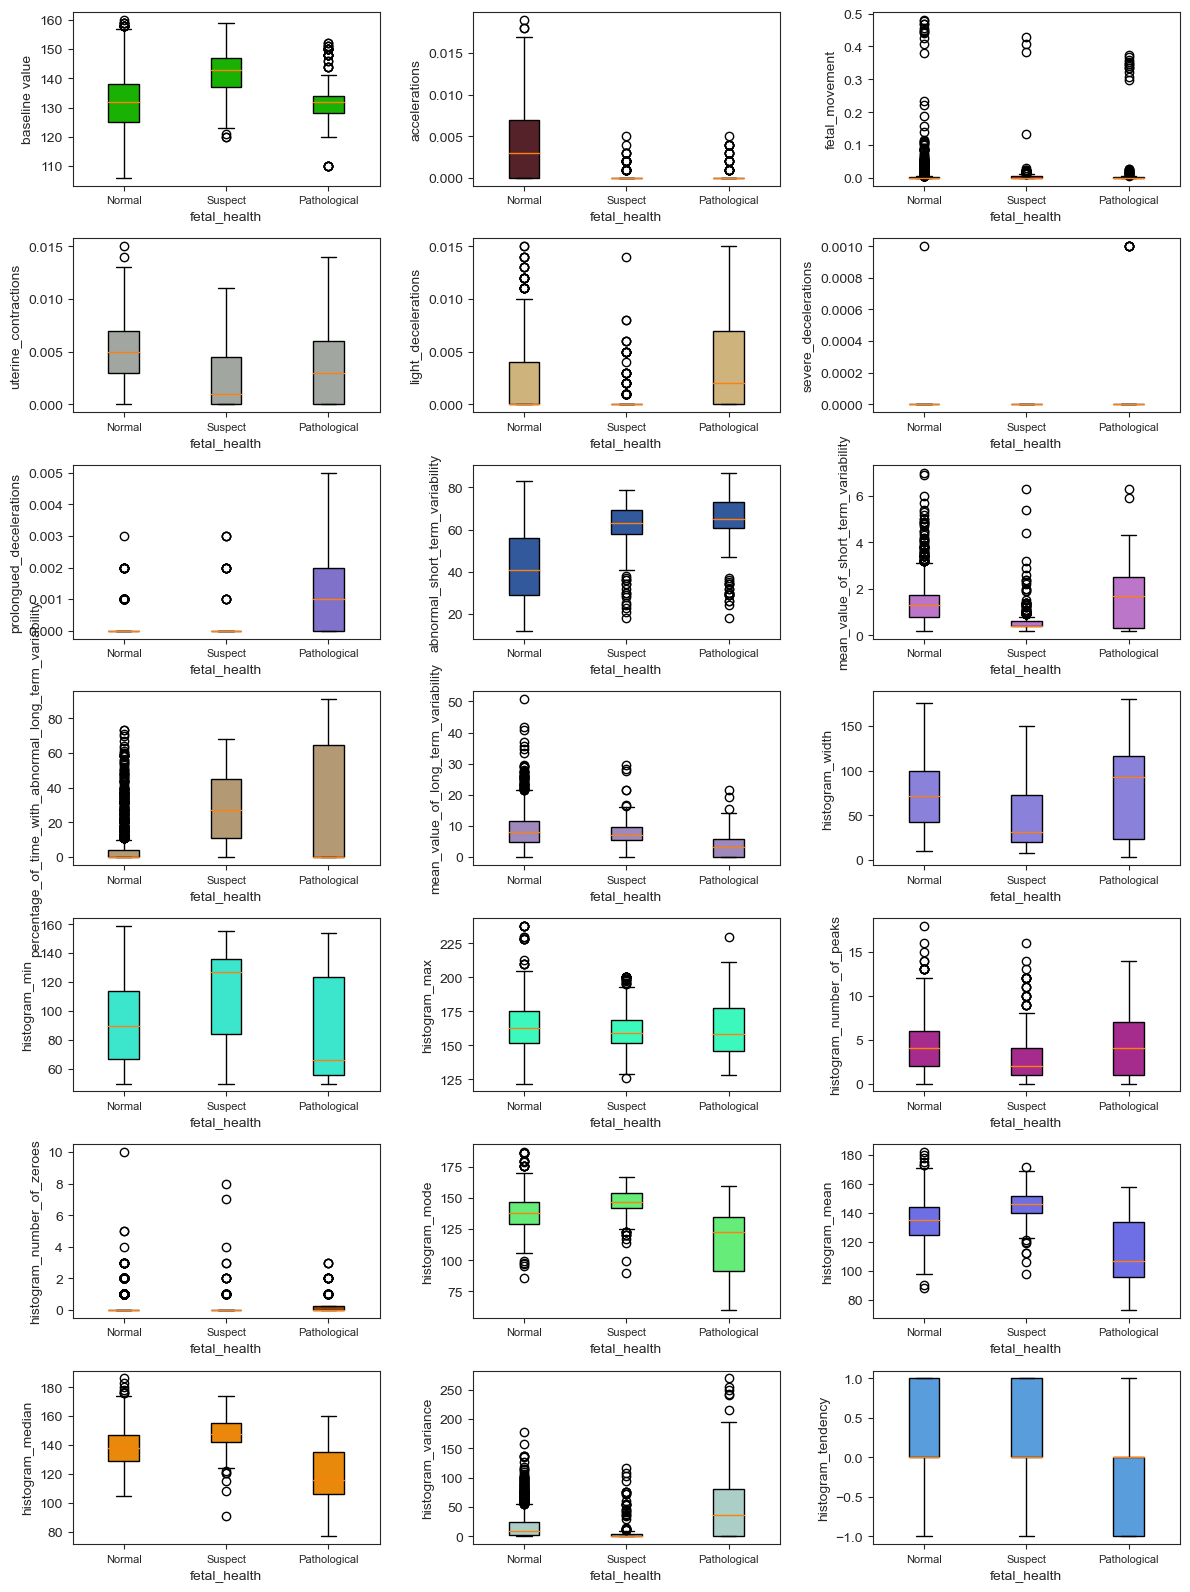

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Create the subplots
fig, axs = plt.subplots(7, 3, figsize=(12, 16))

# Define the variables
variables = [
    'baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions',
    'light_decelerations', 'severe_decelerations', 'prolongued_decelerations',
    'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
    'percentage_of_time_with_abnormal_long_term_variability',
    'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min',
    'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes',
    'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency'
]

# Define the categories
categories = ['Normal', 'Suspect', 'Pathological']

# Iterate over the variables and plot the box plots
for i, ax in enumerate(axs.flatten()):
    variable = variables[i]
    
    # Get the data for each category
    normal_data = fetal[fetal['fetal_health'] == 1][variable]
    suspect_data = fetal[fetal['fetal_health'] == 2][variable]
    pathological_data = fetal[fetal['fetal_health'] == 3][variable]
    
    # Assign random colors to each category
    colors = np.random.rand(3)
    
    # Plot the box plots for each category
    ax.boxplot([normal_data, suspect_data, pathological_data], patch_artist=True, boxprops={'facecolor': colors})
    ax.set_xlabel('fetal_health', fontsize=10)  # Add the x-axis label
    ax.set_ylabel(variable, fontsize=10)  # Add the y-axis label
    ax.set_xticklabels(categories, fontsize=8)  # Set the category names as x tick labels
    ax.spines['left'].set_visible(True)  # Remove the left spine
    ax.spines['top'].set_visible(True)
    ax.spines['top'].set_linestyle('-')  # Remove the top spine

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

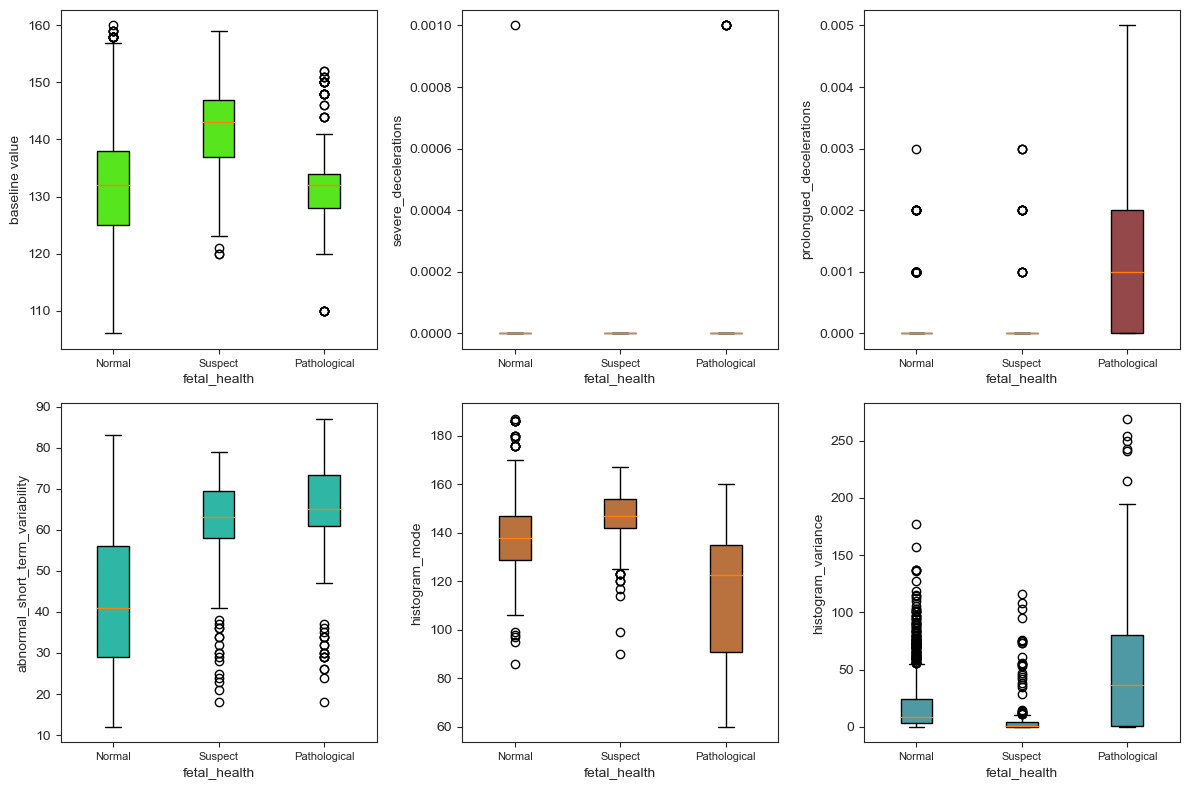

In [83]:
#randomly select 6 variables draw boxplot
import matplotlib.pyplot as plt
import numpy as np

# Create the subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Define the variables to be plotted
variables = ['baseline value', 'severe_decelerations', 'prolongued_decelerations',
             'abnormal_short_term_variability', 'histogram_mode', 'histogram_variance']

# Define the categories
categories = ['Normal', 'Suspect', 'Pathological']

# Iterate over the variables and plot the box plots
for i, ax in enumerate(axs.flatten()):
    variable = variables[i]
    
    # Get the data for each category
    normal_data = fetal[fetal['fetal_health'] == 1][variable]
    suspect_data = fetal[fetal['fetal_health'] == 2][variable]
    pathological_data = fetal[fetal['fetal_health'] == 3][variable]
    
    # Assign random colors to each category
    colors = np.random.rand(3)
    
    # Plot the box plots for each category
    ax.boxplot([normal_data, suspect_data, pathological_data], patch_artist=True, boxprops={'facecolor': colors})
    ax.set_xlabel('fetal_health', fontsize=10)
    ax.set_ylabel(variable, fontsize=10)
    ax.set_xticklabels(categories, fontsize=8)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_visible(True)
    ax.spines['top'].set_linestyle('-')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Considering the significance of the data, severe_decelerations and prolongued_decelerations are removed.

In [19]:
fetal= fetal.drop(['severe_decelerations', 'prolongued_decelerations'], axis=1)

<Axes: >

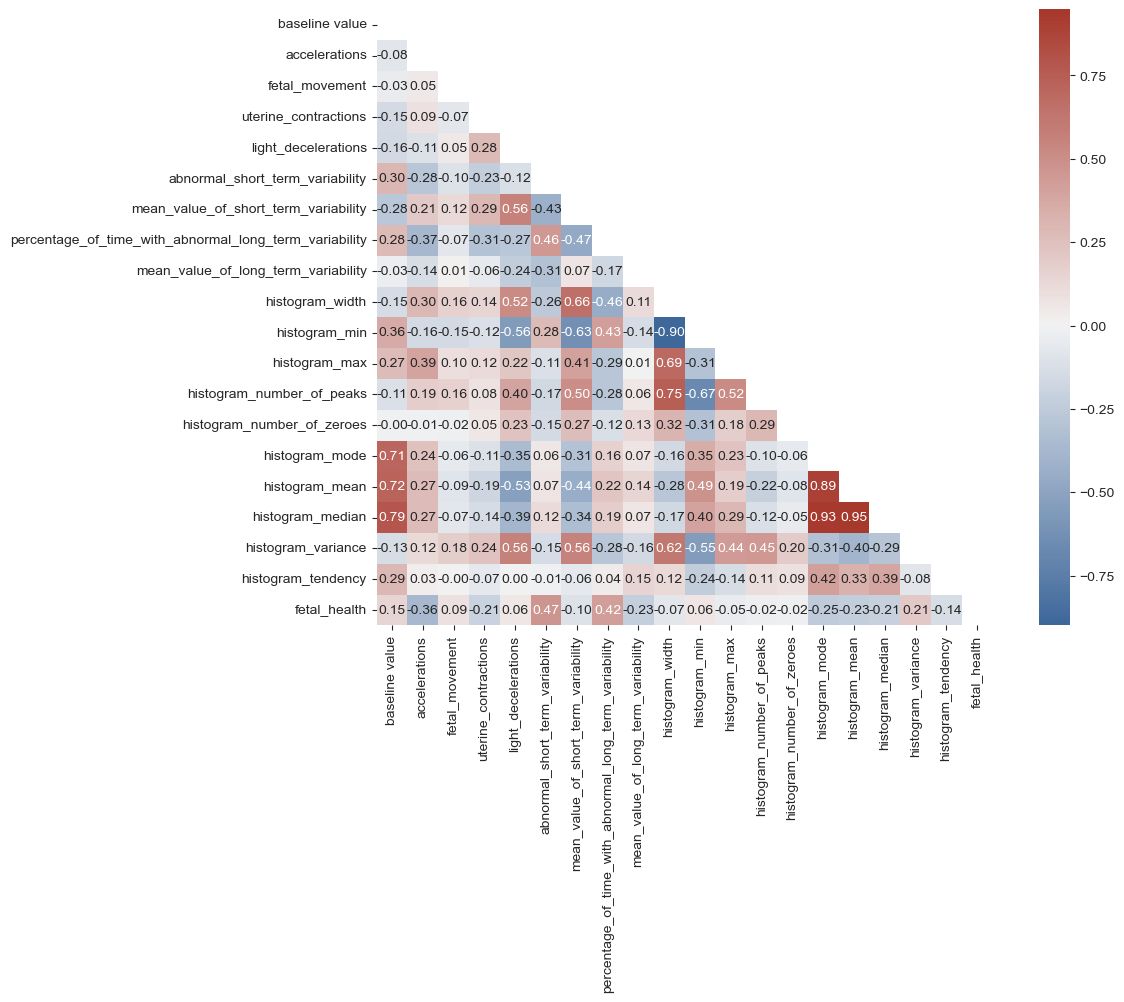

In [20]:
#heatplot
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
# Calculate pairwise-correlation
matrix = fetal.corr()
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)


mask = np.triu(np.ones_like(matrix, dtype=bool)) 
plt.figure(figsize=(12, 8)) 
sns.heatmap(matrix,  mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap=cmap) 

Variables that are weakly correlated with 'fetal_health' are removed, including histogram_min, histogram_number_of_zeroes, histogram_width, fetal_movement, light_deceleration. 

Also variables that are strongly correlated with each other are removed, including histogram_median, histogram_mean, histogram_number_of_peaks. 

At last,there are 10 variables remain.

In [21]:
columns_to_drop = ['histogram_max','histogram_min', 'histogram_number_of_zeroes', 'histogram_width',
                   'fetal_movement', 'light_decelerations', 'histogram_median',
                   'histogram_mean', 'histogram_number_of_peaks']
fetal.drop(columns=columns_to_drop, inplace=True)

In [22]:
fetal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   uterine_contractions                                    2113 non-null   float64
 3   abnormal_short_term_variability                         2113 non-null   float64
 4   mean_value_of_short_term_variability                    2113 non-null   float64
 5   percentage_of_time_with_abnormal_long_term_variability  2113 non-null   float64
 6   mean_value_of_long_term_variability                     2113 non-null   float64
 7   histogram_mode                                          2113 non-null   float64
 8   histogram_variance                    

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
set.seed(1)
X = fetal[['baseline value','accelerations','uterine_contractions','abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_mode','histogram_variance', 'histogram_tendency']]
y = fetal['fetal_health']

# split the data into 3 parts
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

# select feature
bakward_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
                                                     k_features=6,
                                                     forward=False,
                                                     verbose=2,
                                                     scoring="accuracy",
                                                     cv=5)
bakward_feature_selector = bakward_feature_selector.fit(X_val, y_val)

selected_features = bakward_feature_selector.k_feature_names_
selected_feature_indices = bakward_feature_selector.k_feature_idx_
score = bakward_feature_selector.k_score_

print("Selected Features:", selected_features)
print("Selected Feature Indices:", selected_feature_indices)
print("Score:", score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.1s finished

[2023-08-02 23:04:07] Features: 9/6 -- score: 0.9129411764705881[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.8s finished

[2023-08-02 23:04:09] Features: 8/6 -- score: 0.9129411764705881[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.6s finished

[2023-08-02 23:04:11] Features: 7/6 -- score: 0.9152941176470588[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

Selected Features: ('accelerations', 'uterine_contractions', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_mode', 'histogram_variance')
Selected Feature Indices: (1, 2, 3, 5, 7, 8)
Score: 0.9129411764705881


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.5s finished

[2023-08-02 23:04:12] Features: 6/6 -- score: 0.9129411764705881

### Outcome of feature selection:'accelerations', 'uterine_contractions', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_mode', 'histogram_variance'

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train_selected = X_train[['accelerations', 'uterine_contractions', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_mode', 'histogram_variance']]
X_test_selected = X_test[['accelerations', 'uterine_contractions', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_mode', 'histogram_variance']]

model = LogisticRegression()
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

class_accuracy = {}
for class_label in set(y_test):
    indices = y_test == class_label
    class_accuracy[class_label] = accuracy_score(y_test[indices], y_pred[indices])

for class_label, acc in class_accuracy.items():
    print(f"Accuracy for Class {class_label}: {acc}")

Overall Accuracy: 0.8620689655172413
Accuracy for Class 1.0: 0.9678068410462777
Accuracy for Class 2.0: 0.4318181818181818
Accuracy for Class 3.0: 0.5849056603773585


/Users/huangyuqi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Although the overall accuracy is high， the prediction accuracy varies between different separated categories. The prediction accuracy of the ‘normal’ category is high, and the prediction accuracy of the ‘suspect’ category  and the ‘pathological’ category is low.This is because of the unbalanced sample categories. Bootstrap can be used to make the prediction results of each categories more accurate if possible.So next we use Random forest to try again.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Use selected features
X_train_selected = X_train[['accelerations', 'uterine_contractions', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_mode', 'histogram_variance']]
X_test_selected = X_test[['accelerations', 'uterine_contractions', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_mode', 'histogram_variance']]

# Create logistic regression model
logreg = LogisticRegression()

# Train the model on the training set
logreg.fit(X_train_selected, y_train)

# Make predictions on the training set
train_predictions = logreg.predict(X_train_selected)
train_accuracy = accuracy_score(y_train, train_predictions)

# Make predictions on the test set
test_predictions = logreg.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print accuracy
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report
train_report = classification_report(y_train, train_predictions)
test_report = classification_report(y_test, test_predictions)

# print("Train Classification Report:\n", train_report)
print("Test Classification Report:\n", test_report)

Train Accuracy: 0.8602150537634409
Test Accuracy: 0.8620689655172413
Test Classification Report:
               precision    recall  f1-score   support

         1.0       0.89      0.97      0.93       497
         2.0       0.69      0.43      0.53        88
         3.0       0.72      0.58      0.65        53

    accuracy                           0.86       638
   macro avg       0.77      0.66      0.70       638
weighted avg       0.85      0.86      0.85       638



/Users/huangyuqi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# RANDOM FOREST

In [68]:
fetal=pd.read_csv('fetal_health.csv')

## split training set& test set

In [69]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(fetal[['accelerations', 'uterine_contractions', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_mode', 'histogram_variance']], fetal['fetal_health'],test_size=0.30, random_state=0, 
                                                 stratify=fetal['fetal_health'])

#Checking the shapes
print("X_train shape :",X_train.shape)
print("Y_train shape :",y_train.shape)
print("X_test shape :",X_test.shape)
print("Y_test shape :",y_test.shape)

#Normalize the data
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

X_train_scaled=scaler.fit_transform(X_train) #Scaling and fitting the training set to a model
X_test_scaled=scaler.transform(X_test) #Transformation of testing set based off of trained scaler model

X_train shape : (1488, 6)
Y_train shape : (1488,)
X_test shape : (638, 6)
Y_test shape : (638,)


# machine learning

In [70]:
#Packages for metrics and search
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV #Paramterizers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #Accuracy metrics
import itertools #Used for iterations

# search function
    This is a helper function for tuning hyperparameters using the two search methods.
    Methods must be GridSearchCV or RandomizedSearchCV.
    Inputs:
        estimator: Any Classifier
        param_grid: Range of parameters to search
        search: Grid search or Randomized search
        train_x: input variable of your X_train variables 
        train_y: input variable of your y_train variables
        test_x: input variable of your X_test variables
        test_y: input variable of your y_test variables
        label: str to print estimator, default=None
        cv: cross-validation replicates, int, default=10
    Output:
        Returns the estimator instance, clf
        
    Modified from: https://www.kaggle.com/crawford/hyperparameter-search-comparison-grid-vs-random#To-standardize-or-not-to-standardize
 

In [71]:
def Searcher(estimator, param_grid, search, train_x, train_y, test_x, test_y,label=None,cv=10):
    
    
    try:
        if search == "grid":
            clf = GridSearchCV(
                estimator=estimator, 
                param_grid=param_grid, 
                scoring=None,
                n_jobs=-1, 
                cv=cv, #Cross-validation at 10 replicates
                verbose=0,
                return_train_score=True
            )
        elif search == "random":           
            clf = RandomizedSearchCV(
                estimator=estimator,
                param_distributions=param_grid,
                n_iter=10,
                n_jobs=-1,
                cv=cv,
                verbose=0,
                random_state=1,
                return_train_score=True
            )
    except:
        print('Search argument has to be "grid" or "random"')
        sys.exit(0) #Exits program if not grid or random
        
    # Fit the model
    print('Start model fitting for', label)
    clf.fit(X=train_x, y=train_y)
    
    #Testing the model
    
    try:
        if search=='grid':
            cfmatrix=confusion_matrix(
            y_true=test_y, y_pred=clf.predict(test_x))
        
            #Defining prints for accuracy metrics of grid
            print("**Grid search results of", label,"**")
            print("The best parameters are:",clf.best_params_)
            print("Best training accuracy:\t", clf.best_score_)
            print('Classification Report:')
            print(classification_report(y_true=test_y, y_pred=clf.predict(test_x))
             )
        elif search == 'random':
            cfmatrix=confusion_matrix(
            y_true=test_y, y_pred=clf.predict(test_x))

            #Defining prints for accuracy metrics of grid
          
            print("**Random search results of", label,"**")
            print("The best parameters are:",clf.best_params_)
            print("Best training accuracy:\t", clf.best_score_)
            print('Classification Report:')
            print(classification_report(y_true=test_y, y_pred=clf.predict(test_x))
             )
    except:
        print('Search argument has to be "grid" or "random"')
        sys.exit(0) #Exits program if not grid or random
        
    return clf, cfmatrix; #Returns a trained classifier with best parameters

# confusion matrix
    Plot for Confusion Matrix:
    Inputs:
        cm: sklearn confusion_matrix function for y_true and y_pred as seen in https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
        title: title of confusion matrix as a 'string', default=None
        label: the unique label that represents classes for prediction can be done as sorted(dataframe['labels'].unique()).
        color: confusion matrix color, default=None, set as a plt.cm.color, based on matplot lib color gradients

In [72]:
def plot_confusion_matrix(cm, label,color=None,title=None):
    
    classes=sorted(label)
    plt.imshow(cm, interpolation='nearest', cmap=color)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    thresh = cm.mean()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]), 
                 horizontalalignment="center",
                 color="white" if cm[i, j] < thresh else "black")

# Random Forest

Start model fitting for RFC Random
**Random search results of RFC Random **
The best parameters are: {'random_state': 1, 'n_estimators': 90, 'max_depth': 15, 'criterion': 'gini'}
Best training accuracy:	 0.9422047886812986
Classification Report:
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       497
         2.0       0.87      0.74      0.80        88
         3.0       0.92      0.83      0.87        53

    accuracy                           0.94       638
   macro avg       0.91      0.85      0.88       638
weighted avg       0.93      0.94      0.93       638



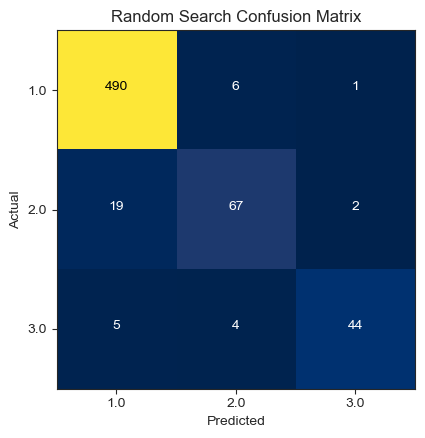

In [73]:
from sklearn.ensemble import RandomForestClassifier as RFC

#Randomized Search RFC Parameters
rfc_dist = {
    "n_estimators": np.arange(10,200, 10),   #By using np.arange it will select from randomized values
    "criterion": ['entropy','gini'],
    "random_state": [1],
    "max_depth":np.arange(1,16,1)}

#Random Search RFC
rfc_rand, cfmatrix_rand= Searcher(RFC(), rfc_dist, "random", X_train_scaled, y_train, X_test_scaled, y_test,label='RFC Random')

#Plotting the confusion matrices
plt.subplots_adjust(left=-0.5, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plt.subplot(121)
plot_confusion_matrix(cfmatrix_grid, title='Random Search Confusion Matrix', label=fetal['fetal_health'].unique(), color=plt.cm.cividis) #randomized matrix function

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x = fetal[['accelerations', 'uterine_contractions', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_mode', 'histogram_variance']]
y = fetal['fetal_health']

scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(x)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=0)

clf = RandomForestClassifier(random_state=0, oob_score=True)
clf.fit(X_train1, y_train1)

train_accuracy = clf.score(X_train1, y_train1)
test_accuracy = clf.score(X_test1, y_test1)

oob_error = 1 - clf.oob_score_

print("train accuracy:", train_accuracy)
print("test accuracy:", test_accuracy)
print("oob error estimate:", oob_error)

train accuracy: 0.9986559139784946
test accuracy: 0.9420062695924765
oob error estimate: 0.0571236559139785


/Users/huangyuqi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/huangyuqi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/huangyuqi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/huangyuqi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/huangyuqi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:

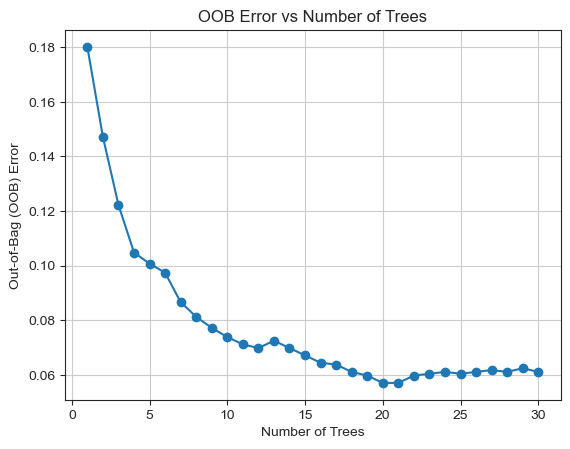

In [57]:
import matplotlib.pyplot as plt
import numpy as np

n_estimators_range = range(1, 31)  #number of trees
oob_errors = []

for n_estimators in n_estimators_range:
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=0, oob_score=True)
    clf.fit(X_train1, y_train1)
    oob_error = 1 - clf.oob_score_
    oob_errors.append(oob_error)

plt.figure()
plt.plot(n_estimators_range, oob_errors, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Out-of-Bag (OOB) Error')
plt.title('OOB Error vs Number of Trees')
plt.grid(True)
plt.show()

# Standardization of variables

In [61]:
x = fetal[['accelerations', 'uterine_contractions', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_mode', 'histogram_variance']]
y = fetal['fetal_health']

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(x)

#showing data
print('x \n' , X[:10])
print('y \n' , y[:10])

x 
 [[0.         0.         0.81333333 0.47252747 0.47244094 0.27137546]
 [0.31578947 0.4        0.06666667 0.         0.63779528 0.04460967]
 [0.15789474 0.53333333 0.05333333 0.         0.63779528 0.04832714]
 [0.15789474 0.53333333 0.05333333 0.         0.60629921 0.04832714]
 [0.36842105 0.53333333 0.05333333 0.         0.60629921 0.04089219]
 [0.05263158 0.66666667 0.18666667 0.         0.12598425 0.63197026]
 [0.05263158 0.86666667 0.22666667 0.         0.08661417 0.79925651]
 [0.         0.         0.94666667 0.06593407 0.48818898 0.01115242]
 [0.         0.13333333 0.96       0.05494505 0.48818898 0.01115242]
 [0.         0.2        0.98666667 0.06593407 0.48818898 0.00371747]]
y 
 0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
5    3.0
6    3.0
7    3.0
8    3.0
9    3.0
Name: fetal_health, dtype: float64


In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=0)

# Importance of values

In [64]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=4,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(x_train, y_train)

#Calculating Details
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(x_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(x_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

RandomForestClassifierModel features importances are :  [0.13371176 0.06085098 0.29359005 0.21972704 0.20404431 0.08807586]
----------------------------------------------------
Predicted Value for RandomForestClassifierModel is :  [1. 1. 1. 1. 2. 1. 1. 1. 1. 2.]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.9036747  0.08210447 0.01422082]
 [0.97559451 0.01902338 0.00538211]
 [0.8750458  0.11588882 0.00906538]
 [0.55611638 0.33292978 0.11095384]
 [0.34670606 0.57714438 0.07614956]
 [0.97738463 0.0203339  0.00228147]
 [0.7448626  0.11098165 0.14415575]
 [0.90188554 0.06760259 0.03051187]
 [0.93299347 0.03545731 0.03154922]
 [0.37207145 0.55288377 0.07504478]]
